# Mounting drive and imports

**Mount google drive**

This will mount the google drive for google colab and you will be able access contents of your drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


import os
# Add your directory path here
os.chdir('/content/drive/My Drive/Deep_learning_unit/Assessment')

Mounted at /content/drive


In [ ]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.2/992.2 KB 36.9 MB/s eta 0:00:00


**Importing libraries**

The tf.keras.datasets package in TensorFlow provides prebuilt utility functions for loading many common datasets.

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from keras import layers, applications, Model, Input
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, MaxPool2D, GlobalAveragePooling2D
from keras.models import Model, load_model, Sequential
from keras.regularizers import l1, l2, l1_l2
from keras.preprocessing import image
from keras.utils import layer_utils, to_categorical
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
import scipy.misc
from tensorflow.python.framework import ops
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import visualkeras
from cycler import cycler
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

/usr/local/lib/python3.8/dist-packages/keras/backend.py:450: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


# Load in dataset

**Loading dataset**

First, we load the CIFAR-10 dataset. This might take a few minutes to download the first time you run it, but after that the files should be cached on disk and loading should be faster.

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another.

In [ ]:
def load_cifar10(num_training=50000, num_test=10000):
    """
    Fetch the CIFAR-10 dataset from the web.
    """
    # Load the raw CIFAR-10 dataset and use appropriate data types and shapes
    cifar10 = tf.keras.datasets.cifar10.load_data()
    (X_train, y_train), (X_test, y_test) = cifar10
    X_train = np.asarray(X_train, dtype=np.float32)
    y_train = np.asarray(y_train, dtype=np.int32).flatten()
    X_test = np.asarray(X_test, dtype=np.float32)
    y_test = np.asarray(y_test, dtype=np.int32).flatten()


    # Normalize the data: subtract the mean pixel and divide by std
    mean_pixel = X_train.mean(axis=(0, 1, 2), keepdims=True)
    std_pixel = X_train.std(axis=(0, 1, 2), keepdims=True)
    X_train = (X_train - mean_pixel) / std_pixel
    X_test = (X_test - mean_pixel) / std_pixel

    return X_train, y_train, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_test, y_test = load_cifar10()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape, y_train.dtype)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

170498071/170498071 [==============================] - 6s 0us/step
Train data shape:  (50000, 32, 32, 3)
Train labels shape:  (50000,) int32
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [ ]:
# Start your code from here

# Experiments

Experiments 1-7 are implementing a CNN model from scratch, and testing different architectures and hyperparameters to increase it's performance as much as possible.

Experiment 8 is applying data augmentation to the most successful model.

Experiment 9 & 10 are applying popular CNN models that have been trained on the ImageNet dataset via transfer learning.

## Experiment 1 - The Baseline Model

### Model Architecture and Details

Influenced by LeNet-5 and AlexNet.

Starting with 32 filters, then fewer as the network gets deeper.

ReLU activation.

Same Padding.

Flatten and dense leyers.

Sparse categorical Cross Entropy is used to calculate loss because we have sparse labels.

RMSProp chosen randomly as optimiser.


In [ ]:
# define the model architecture
model1 = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters=32, strides=(1, 1), kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters=32, strides=(1, 1), kernel_size=3, padding="same", activation="relu"), 
    tf.keras.layers.MaxPool2D(pool_size=2),


    tf.keras.layers.Conv2D(filters=16, strides=(1, 1), kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=16, strides=(1, 1), kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")

])

model1.compile(loss="sparse_categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

### The summary and visualisation

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 16)        4624      
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                    

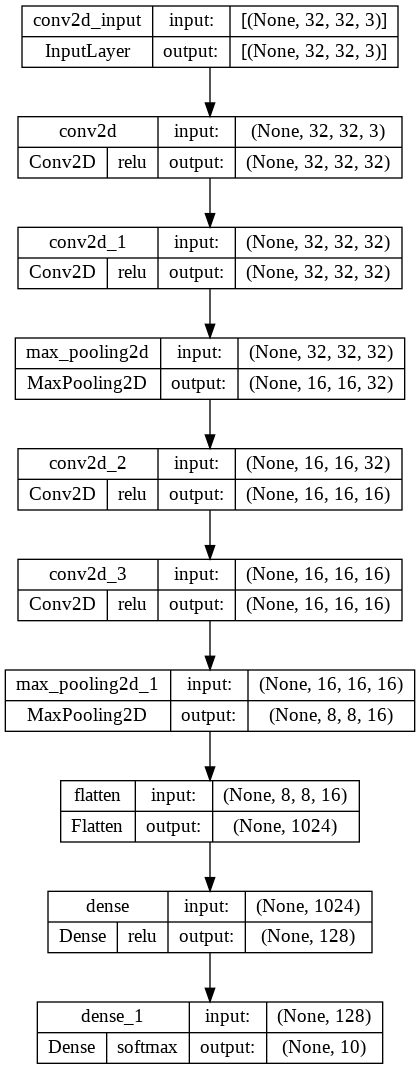

In [ ]:
plot_model(model1, to_file='model1_plot.png', show_shapes=True, show_layer_names=True, show_layer_activations=True)

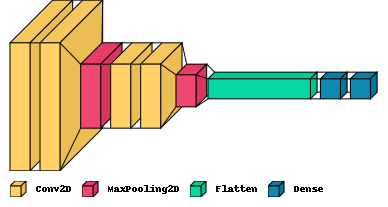

In [ ]:
visualkeras.layered_view(model1, legend=True)

### Train and test

In [ ]:
model1_history = model1.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 19s 6ms/step - loss: 1.3846 - accuracy: 0.5050 - val_loss: 1.2070 - val_accuracy: 0.5751
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0040 - accuracy: 0.6457 - val_loss: 1.0172 - val_accuracy: 0.6392
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8523 - accuracy: 0.7016 - val_loss: 0.9355 - val_accuracy: 0.6795
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7542 - accuracy: 0.7371 - val_loss: 0.8944 - val_accuracy: 0.6926
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6797 - accuracy: 0.7649 - val_loss: 0.9850 - val_accuracy: 0.6863
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6186 - accuracy: 0.7862 - val_loss: 0.9018 - val_accuracy: 0.7069
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5665 - accuracy: 0.8053 - val_loss: 0.9098 - val_accurac

### Results

The base model has barely managed to scape past 70% validation accuracy. There's a great deal of overfitting.

In [ ]:
history1 = pd.DataFrame(model1_history.history)
history1 = history1.rename(columns = {'accuracy': 'Accuracy', 'val_accuracy': 'Validation Accuracy', 'loss': 'Loss', 'val_loss': 'Validation Loss'})
hist1_accuracy = history1['Accuracy']
hist1_val_accuracy = history1['Validation Accuracy']
hist1_loss = history1['Loss']
hist1_val_loss = history1['Validation Loss']

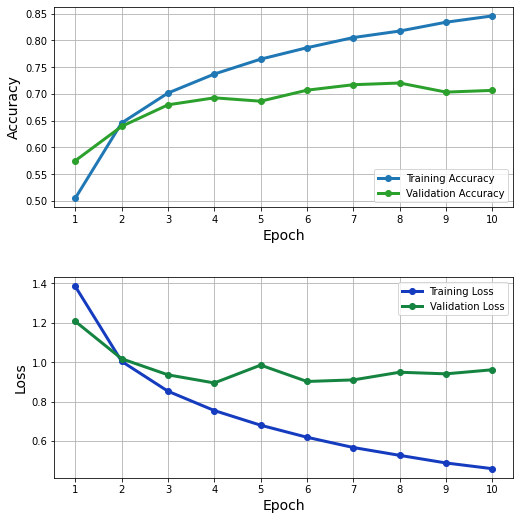

In [ ]:
# plot training accuracy and validation accuracy
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.plot(hist1_accuracy, color='tab:blue', marker='o', linewidth=3)
plt.plot(hist1_val_accuracy, color='tab:green', marker='o', linewidth=3)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.xticks(np.arange(len(range(0, 10))), np.arange(1, len(range(0, 11))))
plt.grid()

# plot training loss and validation loss
plt.subplot(212)
plt.plot(hist1_loss, color='#153BBF', marker='o', linewidth=3)
plt.plot(hist1_val_loss, color='#158440', marker='o', linewidth=3)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.xticks(np.arange(len(range(0, 10))), np.arange(1, len(range(0, 11))))
plt.grid()

plt.tight_layout(pad=3.5)
plt.savefig("Model 1")
plt.show()

## Experiment 2 - Increasing the Size of the Architecture

### Model Architecture and Details

This Experiment creates an additional two convolutional layers and a max pooling layer and placing them at the start of the network.

In [ ]:
# define the model architecture
model2 = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters=64, strides=(1, 1), kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters=64, strides=(1, 1), kernel_size=3, padding="same", activation="relu"), 
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=32, strides=(1, 1), kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=32, strides=(1, 1), kernel_size=3, padding="same", activation="relu"), 
    tf.keras.layers.MaxPool2D(pool_size=2),


    tf.keras.layers.Conv2D(filters=16, strides=(1, 1), kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=16, strides=(1, 1), kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")

])

model2.compile(loss="sparse_categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

### The summary and visualisation

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                  

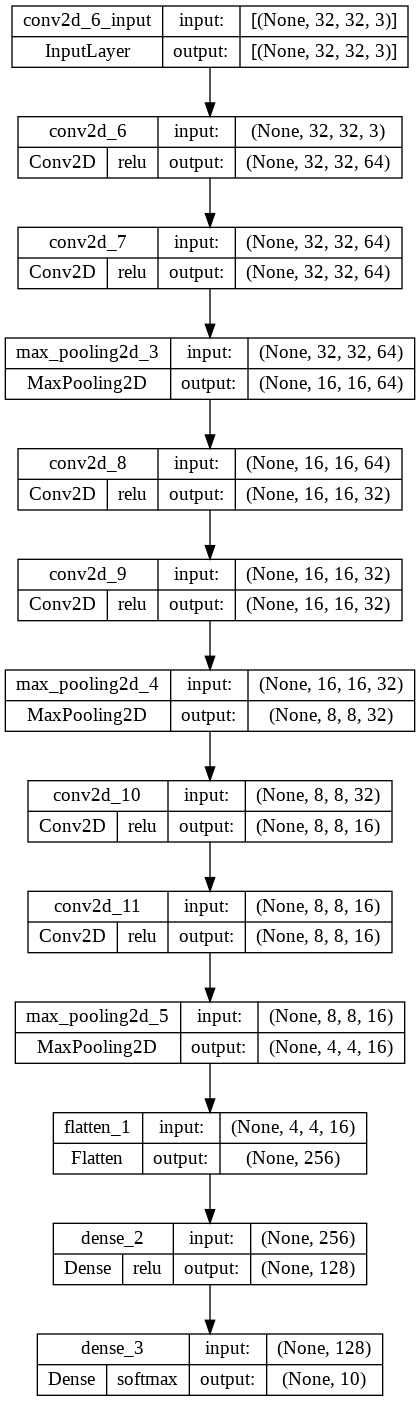

In [ ]:
plot_model(model2, show_shapes=True, show_layer_names=True, show_layer_activations=True)

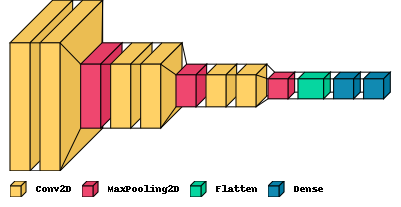

In [ ]:
visualkeras.layered_view(model2, legend=True)

### Train and test

In [ ]:
model2_history = model2.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.4959 - accuracy: 0.4598 - val_loss: 1.1813 - val_accuracy: 0.5751
Epoch 2/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0588 - accuracy: 0.6249 - val_loss: 1.0030 - val_accuracy: 0.6517
Epoch 3/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9015 - accuracy: 0.6822 - val_loss: 0.8922 - val_accuracy: 0.6896
Epoch 4/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8116 - accuracy: 0.7156 - val_loss: 0.8923 - val_accuracy: 0.7002
Epoch 5/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7525 - accuracy: 0.7387 - val_loss: 0.9509 - val_accuracy: 0.6899
Epoch 6/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7101 - accuracy: 0.7538 - val_loss: 0.7888 - val_accuracy: 0.7347
Epoch 7/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6775 - accuracy: 0.7648 - val_loss: 0.8531 - val_ac

### Results

Much better results than the base model. It does seem to prematurely converge after 5 epochs.

In [ ]:
history2 = pd.DataFrame(model2_history.history)
history2 = history2.rename(columns = {'accuracy': 'Accuracy', 'val_accuracy': 'Validation Accuracy', 'loss': 'Loss', 'val_loss': 'Validation Loss'})
hist2_accuracy = history2['Accuracy']
hist2_val_accuracy = history2['Validation Accuracy']
hist2_loss = history2['Loss']
hist2_val_loss = history2['Validation Loss']

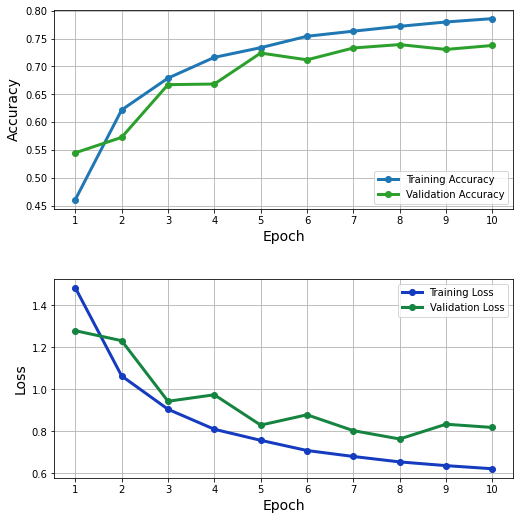

In [ ]:
# plot training accuracy and validation accuracy
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.plot(hist2_accuracy, color='tab:blue', marker='o', linewidth=3)
plt.plot(hist2_val_accuracy, color='tab:green', marker='o', linewidth=3)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.xticks(np.arange(len(range(0, 10))), np.arange(1, len(range(0, 11))))
plt.grid()

# plot training loss and validation loss
plt.subplot(212)
plt.plot(hist2_loss, color='#153BBF', marker='o', linewidth=3)
plt.plot(hist2_val_loss, color='#158440', marker='o', linewidth=3)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.xticks(np.arange(len(range(0, 10))), np.arange(1, len(range(0, 11))))
plt.grid()

plt.tight_layout(pad=3.5)
plt.savefig("Model 2")
plt.show()

## Experiment 3 - Changing Number of Filters and Filter Size

### Model Architecture and Details

Testing different filter sizes and changing it to increase the number of filters as the network gets deeper, rather than decrease.

In [ ]:
# define the model architecture
model3 = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters=32, strides=(1, 1), kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters=32, strides=(1, 1), kernel_size=3, padding="same", activation="relu"), 
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=64, strides=(1, 1), kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=64, strides=(1, 1), kernel_size=3, padding="same", activation="relu"), 
    tf.keras.layers.MaxPool2D(pool_size=2),


    tf.keras.layers.Conv2D(filters=128, strides=(1, 1), kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=128, strides=(1, 1), kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")

])

model3.compile(loss="sparse_categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

### The summary and visualisation

In [ ]:
model3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_49 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_51 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                 

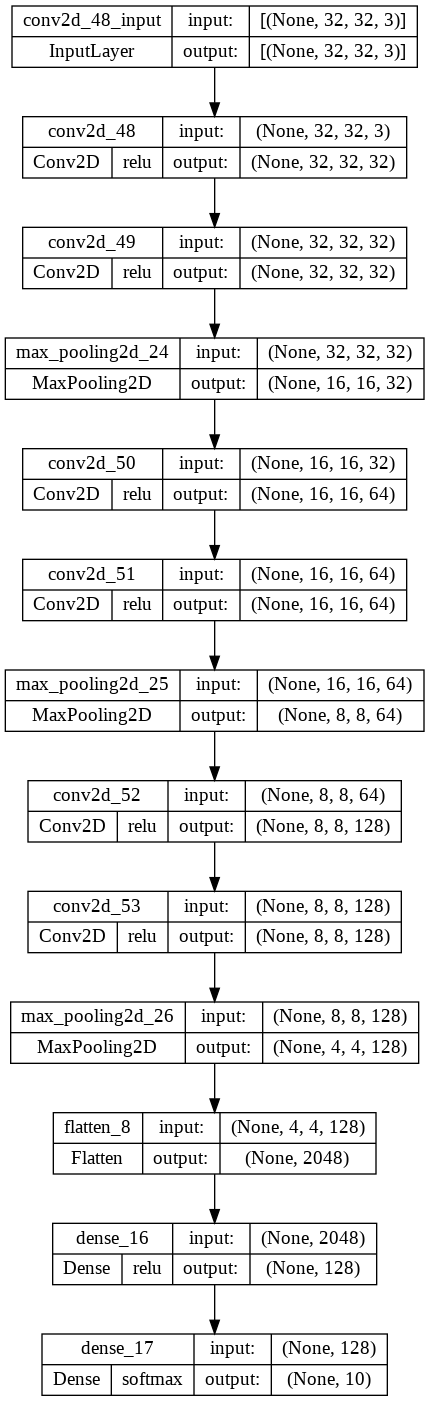

In [ ]:
plot_model(model3, show_shapes=True, show_layer_names=True, show_layer_activations=True)

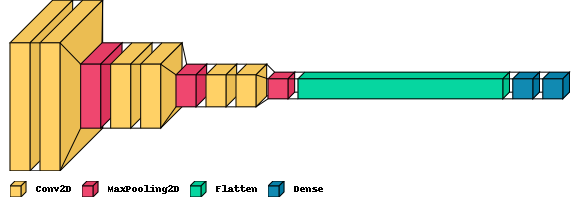

In [ ]:
visualkeras.layered_view(model3, legend=True)

### Train and test

In [ ]:
model3_history = model3.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 11s 6ms/step - loss: 1.3698 - accuracy: 0.5089 - val_loss: 1.0484 - val_accuracy: 0.6367
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8696 - accuracy: 0.6989 - val_loss: 0.8074 - val_accuracy: 0.7196
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7073 - accuracy: 0.7567 - val_loss: 0.7747 - val_accuracy: 0.7336
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6207 - accuracy: 0.7897 - val_loss: 0.8813 - val_accuracy: 0.7095
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5886 - accuracy: 0.8040 - val_loss: 0.7188 - val_accuracy: 0.7629
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5745 - accuracy: 0.8116 - val_loss: 1.0566 - val_accuracy: 0.7026
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5654 - accuracy: 0.8161 - val_loss: 0.8080 - val_accuracy

### Results

The model has now broken the 75% validation accuracy mark, but there is high variance in the validation accuracy.

In [ ]:
history3 = pd.DataFrame(model3_history.history)
history3 = history3.rename(columns = {'accuracy': 'Accuracy', 'val_accuracy': 'Validation Accuracy', 'loss': 'Loss', 'val_loss': 'Validation Loss'})
hist3_accuracy = history3['Accuracy']
hist3_val_accuracy = history3['Validation Accuracy']
hist3_loss = history3['Loss']
hist3_val_loss = history3['Validation Loss']

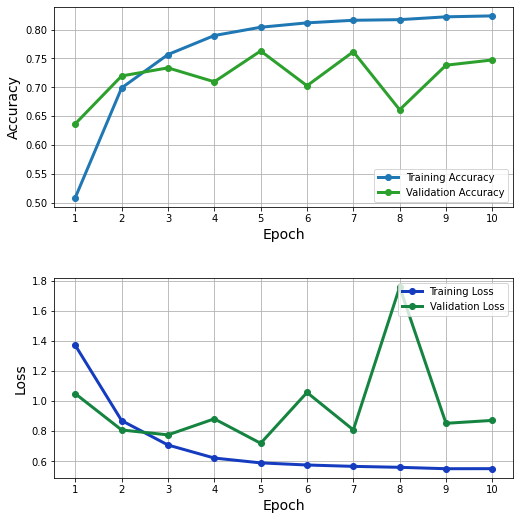

In [ ]:
# plot training accuracy and validation accuracy
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.plot(hist3_accuracy, color='tab:blue', marker='o', linewidth=3)
plt.plot(hist3_val_accuracy, color='tab:green', marker='o', linewidth=3)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.xticks(np.arange(len(range(0, 10))), np.arange(1, len(range(0, 11))))
plt.grid()

# plot training loss and validation loss
plt.subplot(212)
plt.plot(hist3_loss, color='#153BBF', marker='o', linewidth=3)
plt.plot(hist3_val_loss, color='#158440', marker='o', linewidth=3)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.xticks(np.arange(len(range(0, 10))), np.arange(1, len(range(0, 11))))
plt.grid()

plt.tight_layout(pad=3.5)
plt.savefig("Model 2")
plt.show()

## Experiment 4 - Changing Pooling Type and Size

Testing Max pooling against Average Pooling, and different pool sizes.

### Model Architecture and Details

In [ ]:
# define the model architecture
model4 = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters=32, strides=(1, 1), kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters=32, strides=(1, 1), kernel_size=3, padding="same", activation="relu"), 
    tf.keras.layers.AvgPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=64, strides=(1, 1), kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=64, strides=(1, 1), kernel_size=3, padding="same", activation="relu"), 
    tf.keras.layers.AvgPool2D(pool_size=2),


    tf.keras.layers.Conv2D(filters=128, strides=(1, 1), kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=128, strides=(1, 1), kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.AvgPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")

])

model4.compile(loss="sparse_categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

### The summary and visualisation

In [ ]:
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 average_pooling2d_1 (Averag  (None, 8, 8, 64)         0         
 ePooling2D)                                            

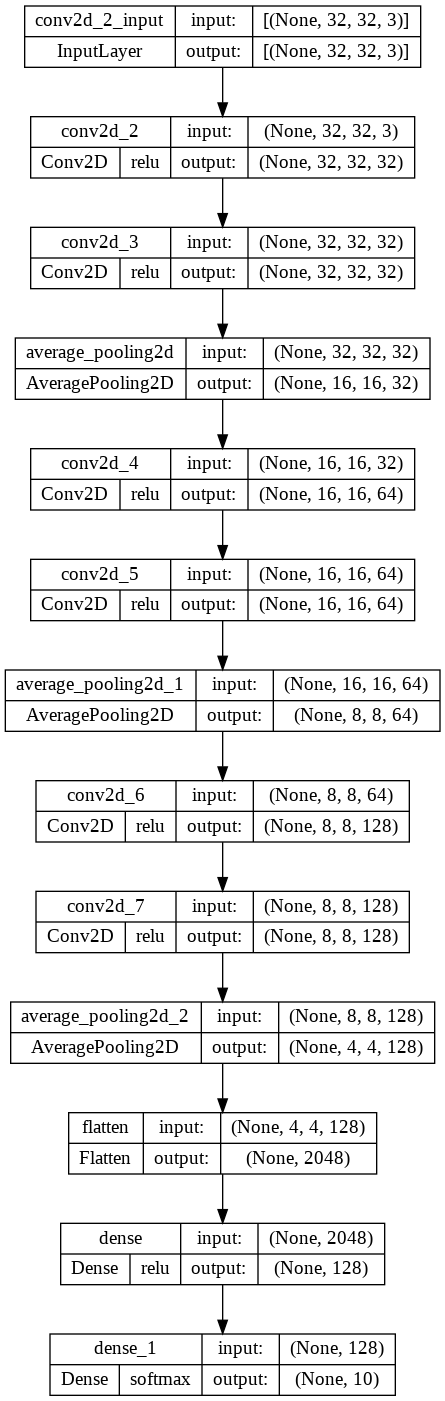

In [ ]:
plot_model(model4, show_shapes=True, show_layer_names=True, show_layer_activations=True)

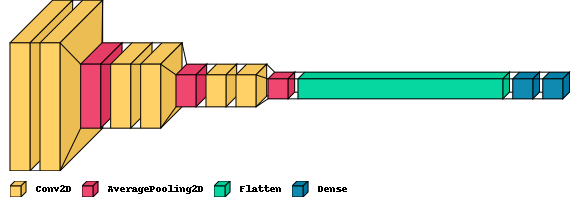

In [ ]:
visualkeras.layered_view(model4, legend=True)

### Train and test

In [ ]:
model4_history = model4.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 19s 6ms/step - loss: 1.4457 - accuracy: 0.4784 - val_loss: 1.3026 - val_accuracy: 0.5512
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9253 - accuracy: 0.6754 - val_loss: 0.8360 - val_accuracy: 0.7091
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7233 - accuracy: 0.7494 - val_loss: 1.0105 - val_accuracy: 0.6614
Epoch 4/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.6049 - accuracy: 0.7920 - val_loss: 0.8632 - val_accuracy: 0.7221
Epoch 5/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.5284 - accuracy: 0.8199 - val_loss: 0.8024 - val_accuracy: 0.7516
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4772 - accuracy: 0.8382 - val_loss: 0.7966 - val_accuracy: 0.7726
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4556 - accuracy: 0.8496 - val_loss: 0.7824 - val_accuracy

### Results

Surprisingly average pooling achieved the greatest results. Changing the pool size to anything other than 2 decreases performance.

In [ ]:
history4 = pd.DataFrame(model4_history.history)
history4 = history4.rename(columns = {'accuracy': 'Accuracy', 'val_accuracy': 'Validation Accuracy', 'loss': 'Loss', 'val_loss': 'Validation Loss'})
hist4_accuracy = history4['Accuracy']
hist4_val_accuracy = history4['Validation Accuracy']
hist4_loss = history4['Loss']
hist4_val_loss = history4['Validation Loss']

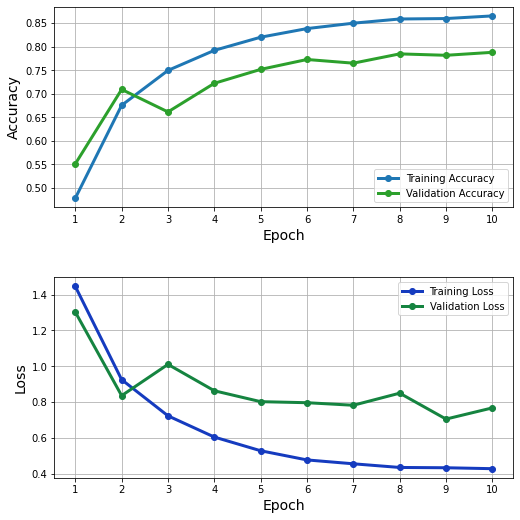

In [ ]:
# plot training accuracy and validation accuracy
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.plot(hist4_accuracy, color='tab:blue', marker='o', linewidth=3)
plt.plot(hist4_val_accuracy, color='tab:green', marker='o', linewidth=3)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.xticks(np.arange(len(range(0, 10))), np.arange(1, len(range(0, 11))))
plt.grid()

# plot training loss and validation loss
plt.subplot(212)
plt.plot(hist4_loss, color='#153BBF', marker='o', linewidth=3)
plt.plot(hist4_val_loss, color='#158440', marker='o', linewidth=3)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.xticks(np.arange(len(range(0, 10))), np.arange(1, len(range(0, 11))))
plt.grid()

plt.tight_layout(pad=3.5)
plt.savefig("Model 2")
plt.show()

## Experiment 5 - Applying Normalisation

### Model Architecture and Details

Applying batch normalisation after every convolutional layer and the first dense layer.

In [ ]:
# define the model architecture
model5 = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters=32, strides=(1, 1), kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, strides=(1, 1), kernel_size=3, padding="same", activation="relu"), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AvgPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=64, strides=(1, 1), kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=64, strides=(1, 1), kernel_size=3, padding="same", activation="relu"), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AvgPool2D(pool_size=2),


    tf.keras.layers.Conv2D(filters=128, strides=(1, 1), kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=128, strides=(1, 1), kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AvgPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax")

])

model5.compile(loss="sparse_categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

### The summary and visualisation

In [ ]:
model5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_27 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_36 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_28 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 average_pooling2d_16 (Avera  (None, 16, 16, 32)       0         
 gePooling2D)                                                    
                                                      

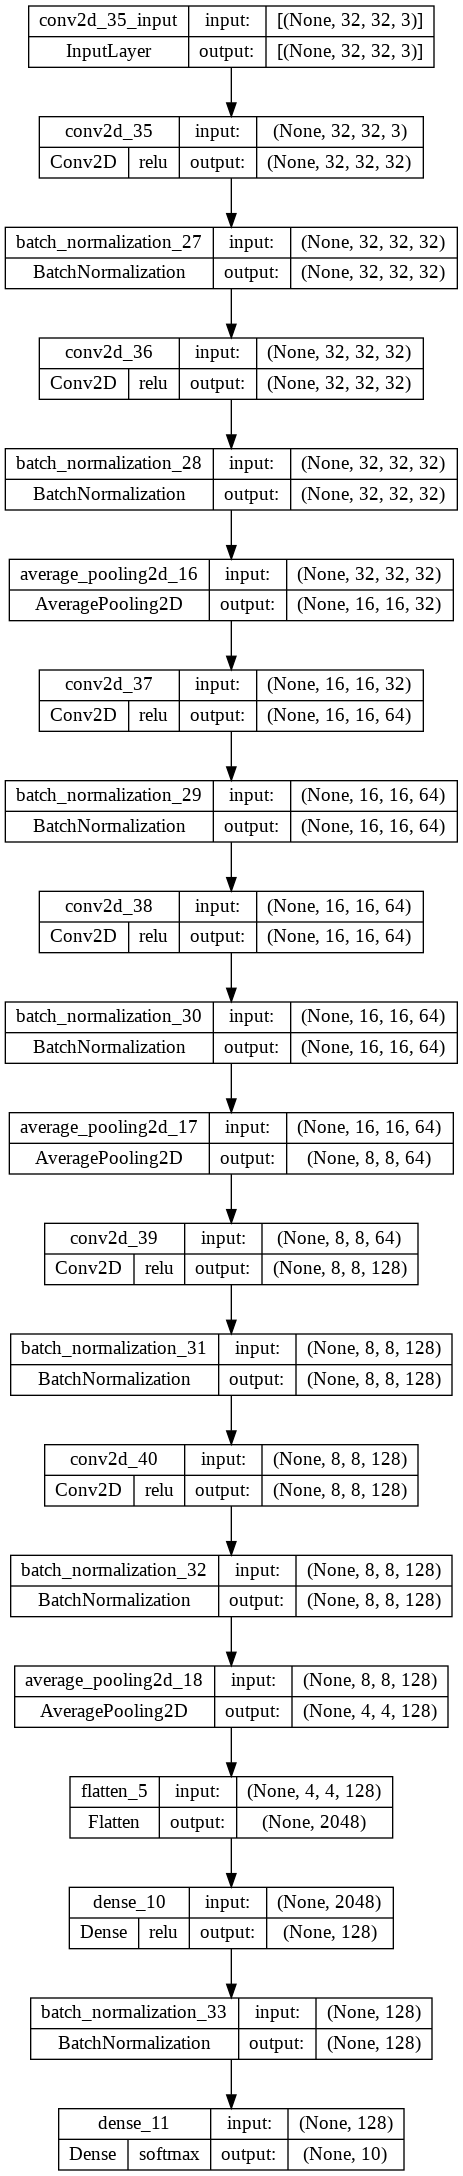

In [ ]:
plot_model(model5, show_shapes=True, show_layer_names=True, show_layer_activations=True)

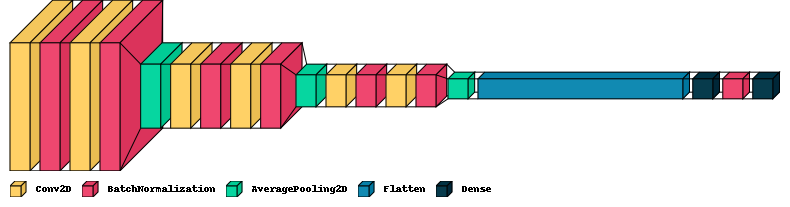

In [ ]:
visualkeras.layered_view(model5, legend=True)

### Train and test

In [ ]:
model5_history = model5.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2028 - accuracy: 0.5748 - val_loss: 0.8476 - val_accuracy: 0.6999
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7298 - accuracy: 0.7453 - val_loss: 0.6926 - val_accuracy: 0.7607
Epoch 3/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.5579 - accuracy: 0.8064 - val_loss: 0.6505 - val_accuracy: 0.7832
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4473 - accuracy: 0.8455 - val_loss: 0.5535 - val_accuracy: 0.8124
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.3600 - accuracy: 0.8752 - val_loss: 0.5878 - val_accuracy: 0.8126
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2852 - accuracy: 0.9022 - val_loss: 0.6099 - val_accuracy: 0.8174
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.2270 - accuracy: 0.9209 - val_loss: 0.6105 - val_ac

### Results

Normalisation has successfully resulted in the model achieving great than 80% validation accuracy, but has also resulted in the greatest amount of overfitting.

In [ ]:
history5 = pd.DataFrame(model5_history.history)
history5 = history5.rename(columns = {'accuracy': 'Accuracy', 'val_accuracy': 'Validation Accuracy', 'loss': 'Loss', 'val_loss': 'Validation Loss'})
hist5_accuracy = history5['Accuracy']
hist5_val_accuracy = history5['Validation Accuracy']
hist5_loss = history5['Loss']
hist5_val_loss = history5['Validation Loss']

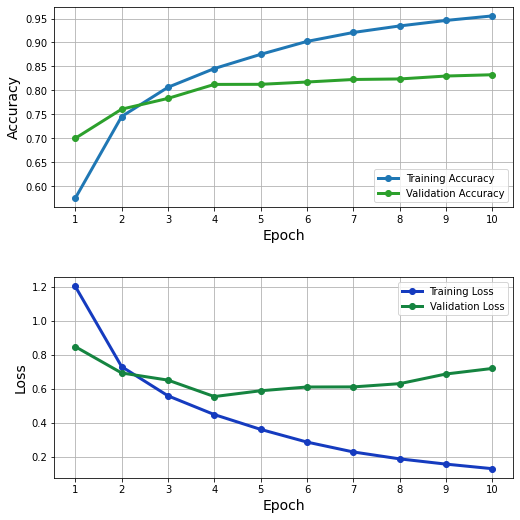

In [ ]:
# plot training accuracy and validation accuracy
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.plot(hist5_accuracy, color='tab:blue', marker='o', linewidth=3)
plt.plot(hist5_val_accuracy, color='tab:green', marker='o', linewidth=3)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.xticks(np.arange(len(range(0, 10))), np.arange(1, len(range(0, 11))))
plt.grid()

# plot training loss and validation loss
plt.subplot(212)
plt.plot(hist5_loss, color='#153BBF', marker='o', linewidth=3)
plt.plot(hist5_val_loss, color='#158440', marker='o', linewidth=3)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.xticks(np.arange(len(range(0, 10))), np.arange(1, len(range(0, 11))))
plt.grid()

plt.tight_layout(pad=3.5)
plt.savefig("Model 2")
plt.show()

## Experiment 6 - Applying Regularisation

### Model Architecture and Details

This experiment tries to reduce overfitting by testing L1, L2 regularisation and a combination of both. It also tests dropout with various dropout percentages.

In [ ]:
# define the model architecture
model6 = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters=32, strides=(1, 1), kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, strides=(1, 1), kernel_size=3, padding="same", activation="relu"), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AvgPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(filters=64, strides=(1, 1), kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=64, strides=(1, 1), kernel_size=3, padding="same", activation="relu"), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AvgPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Conv2D(filters=128, strides=(1, 1), kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=128, strides=(1, 1), kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AvgPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax")

])

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model6.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

### The summary and visualisation

In [ ]:
model6.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1224 (Conv2D)        (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_1225 (B  (None, 32, 32, 32)       128       
 atchNormalization)                                              
                                                                 
 conv2d_1225 (Conv2D)        (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1226 (B  (None, 32, 32, 32)       128       
 atchNormalization)                                              
                                                                 
 average_pooling2d_9 (Averag  (None, 16, 16, 32)       0         
 ePooling2D)                                                     
                                                     

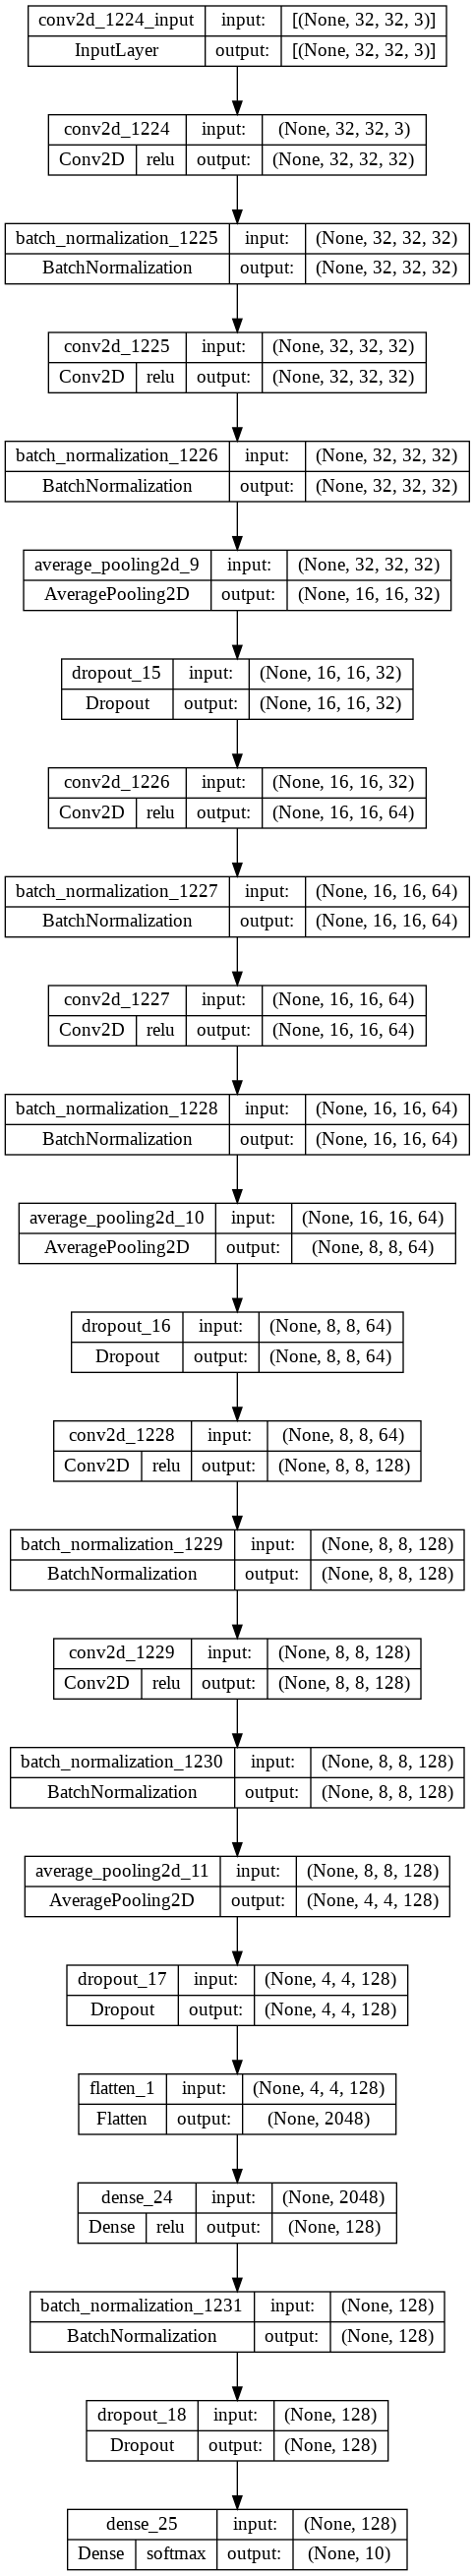

In [ ]:
plot_model(model6, show_shapes=True, show_layer_names=True, show_layer_activations=True)

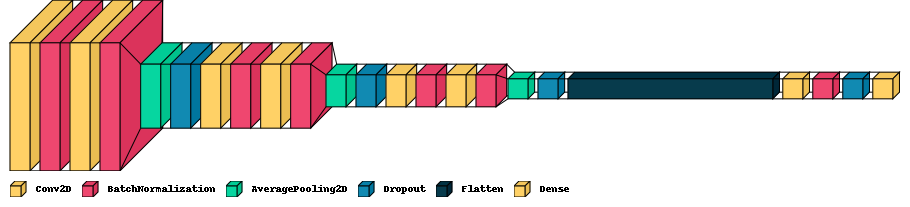

In [ ]:
visualkeras.layered_view(model6, legend=True)

### Train and test

In [ ]:
model6_history = model6.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 14s 8ms/step - loss: 1.6432 - accuracy: 0.4357 - val_loss: 1.0661 - val_accuracy: 0.6226
Epoch 2/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0968 - accuracy: 0.6152 - val_loss: 0.8775 - val_accuracy: 0.6900
Epoch 3/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9272 - accuracy: 0.6805 - val_loss: 0.7545 - val_accuracy: 0.7395
Epoch 4/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8285 - accuracy: 0.7157 - val_loss: 0.6609 - val_accuracy: 0.7680
Epoch 5/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7670 - accuracy: 0.7367 - val_loss: 0.6706 - val_accuracy: 0.7741
Epoch 6/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7227 - accuracy: 0.7546 - val_loss: 0.6226 - val_accuracy: 0.7895
Epoch 7/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6879 - accuracy: 0.7688 - val_loss: 0.5529 - val_ac

### Results

Any application of L1 and L2 regularisation had a negative effect on performance. Dropout has successfully increased validation accuracy as well as overfitting.

In [ ]:
history6 = pd.DataFrame(model6_history.history)
history6 = history6.rename(columns = {'accuracy': 'Accuracy', 'val_accuracy': 'Validation Accuracy', 'loss': 'Loss', 'val_loss': 'Validation Loss'})
hist6_accuracy = history6['Accuracy']
hist6_val_accuracy = history6['Validation Accuracy']
hist6_loss = history6['Loss']
hist6_val_loss = history6['Validation Loss']

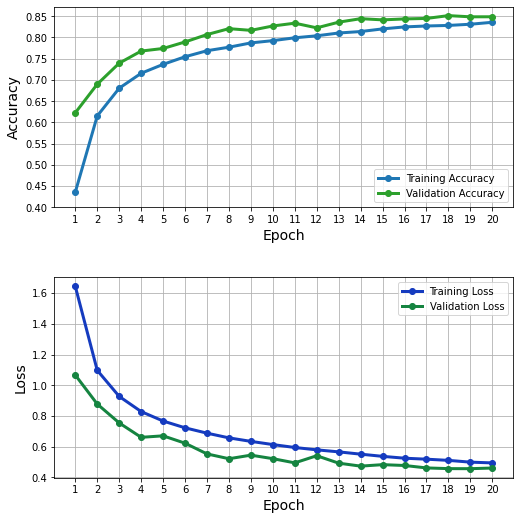

In [ ]:
# plot training accuracy and validation accuracy
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.plot(hist6_accuracy, color='tab:blue', marker='o', linewidth=3)
plt.plot(hist6_val_accuracy, color='tab:green', marker='o', linewidth=3)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.xticks(np.arange(len(range(0, 20))), np.arange(1, len(range(0, 21))))
plt.yticks(np.arange(0.4, 0.9, 0.05))
plt.grid()

# plot training loss and validation loss
plt.subplot(212)
plt.plot(hist6_loss, color='#153BBF', marker='o', linewidth=3)
plt.plot(hist6_val_loss, color='#158440', marker='o', linewidth=3)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.xticks(np.arange(len(range(0, 20))), np.arange(1, len(range(0, 21))))

plt.grid()

plt.tight_layout(pad=3.5)
plt.show()

## Experiment 7 - Changing Optimisation Type and Learning Rate

### Model Architecture and Details

Tested Adam, RMSProp, and Stochastic gradient descent with varying mini batch sizes and learning rates.

In [ ]:
# define the model architecture
model7 = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters=32, strides=(1, 1), kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, strides=(1, 1), kernel_size=3, padding="same", activation="relu"), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AvgPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(filters=64, strides=(1, 1), kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=64, strides=(1, 1), kernel_size=3, padding="same", activation="relu"), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AvgPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Conv2D(filters=128, strides=(1, 1), kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=128, strides=(1, 1), kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AvgPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax")

])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model7.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

### The summary and visualisation

In [ ]:
model7.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1236 (Conv2D)        (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_1239 (B  (None, 32, 32, 32)       128       
 atchNormalization)                                              
                                                                 
 conv2d_1237 (Conv2D)        (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1240 (B  (None, 32, 32, 32)       128       
 atchNormalization)                                              
                                                                 
 average_pooling2d_15 (Avera  (None, 16, 16, 32)       0         
 gePooling2D)                                                    
                                                     

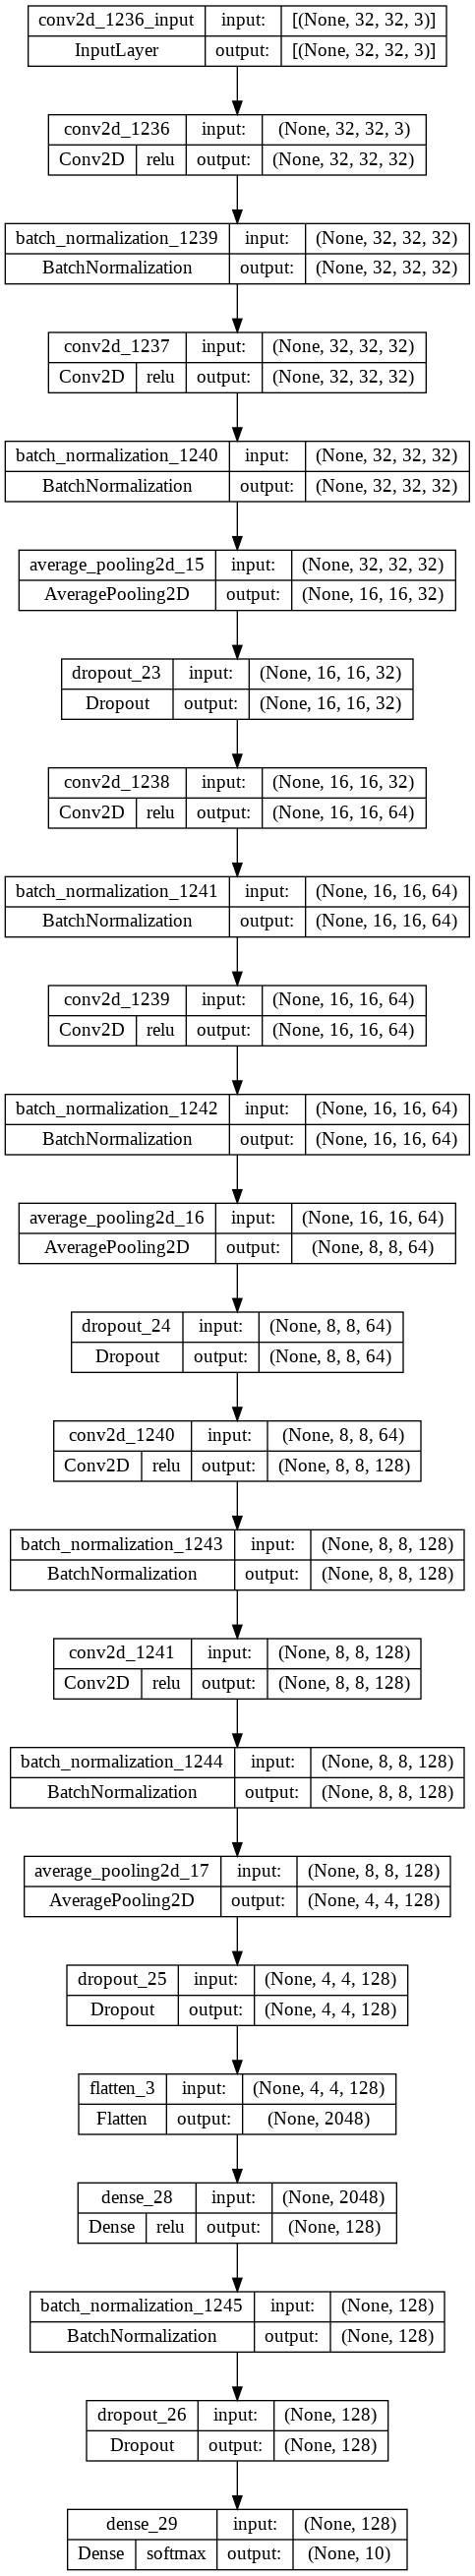

In [ ]:
plot_model(model7, show_shapes=True, show_layer_names=True, show_layer_activations=True)

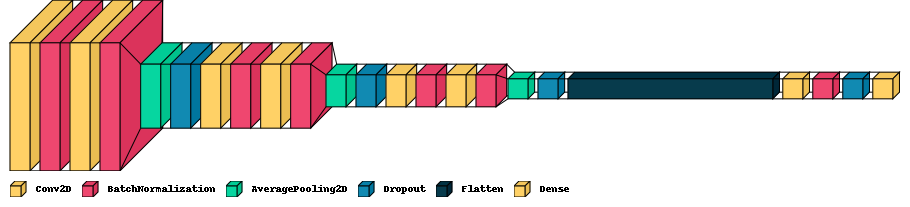

In [ ]:
visualkeras.layered_view(model7, legend=True)

### Train and test

In [ ]:
model7_history = model7.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 13s 7ms/step - loss: 1.6389 - accuracy: 0.4376 - val_loss: 1.1170 - val_accuracy: 0.6020
Epoch 2/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1181 - accuracy: 0.6063 - val_loss: 0.8727 - val_accuracy: 0.6902
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9387 - accuracy: 0.6727 - val_loss: 0.7775 - val_accuracy: 0.7233
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8462 - accuracy: 0.7095 - val_loss: 0.6747 - val_accuracy: 0.7667
Epoch 5/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7722 - accuracy: 0.7354 - val_loss: 0.6353 - val_accuracy: 0.7830
Epoch 6/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7242 - accuracy: 0.7511 - val_loss: 0.5584 - val_accuracy: 0.8063
Epoch 7/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6804 - accuracy: 0.7665 - val_loss: 0.5995 - val_ac

### Results

Adam optimisation increased the validation accuracy by 0.5%. This is the best result for the implemented model all of these experiments. Stochastic gradient descent performed the worst, as well as any mini batch sizes. 

In [ ]:
history7 = pd.DataFrame(model7_history.history)
history7 = history7.rename(columns = {'accuracy': 'Accuracy', 'val_accuracy': 'Validation Accuracy', 'loss': 'Loss', 'val_loss': 'Validation Loss'})
hist7_accuracy = history7['Accuracy']
hist7_val_accuracy = history7['Validation Accuracy']
hist7_loss = history7['Loss']
hist7_val_loss = history7['Validation Loss']

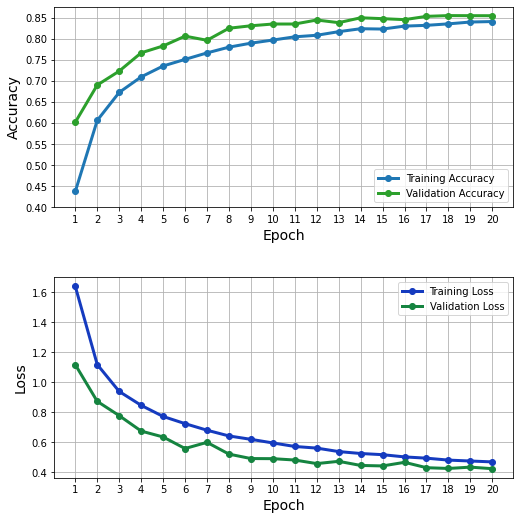

In [ ]:
# plot training accuracy and validation accuracy
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.plot(hist7_accuracy, color='tab:blue', marker='o', linewidth=3)
plt.plot(hist7_val_accuracy, color='tab:green', marker='o', linewidth=3)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.xticks(np.arange(len(range(0, 20))), np.arange(1, len(range(0, 21))))
plt.yticks(np.arange(0.4, 0.9, 0.05))
plt.grid()

# plot training loss and validation loss
plt.subplot(212)
plt.plot(hist7_loss, color='#153BBF', marker='o', linewidth=3)
plt.plot(hist7_val_loss, color='#158440', marker='o', linewidth=3)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.xticks(np.arange(len(range(0, 20))), np.arange(1, len(range(0, 21))))

plt.grid()

plt.tight_layout(pad=3.5)
plt.show()

## Experiment 8 - Data Augmentation

This experiment experiments with data augmentation. Creating artifical variants of each training instance.

### Model Architecture and Details

In [ ]:
# define the model architecture
model8 = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters=32, strides=(1, 1), kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, strides=(1, 1), kernel_size=3, padding="same", activation="relu"), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AvgPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(filters=64, strides=(1, 1), kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=64, strides=(1, 1), kernel_size=3, padding="same", activation="relu"), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AvgPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Conv2D(filters=128, strides=(1, 1), kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=128, strides=(1, 1), kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AvgPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax")

])

model8.compile(loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

### The summary and visualisation

In [ ]:
model8.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_150 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_175 (Ba  (None, 32, 32, 32)       128       
 tchNormalization)                                               
                                                                 
 conv2d_151 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_176 (Ba  (None, 32, 32, 32)       128       
 tchNormalization)                                               
                                                                 
 average_pooling2d_75 (Avera  (None, 16, 16, 32)       0         
 gePooling2D)                                                    
                                                     

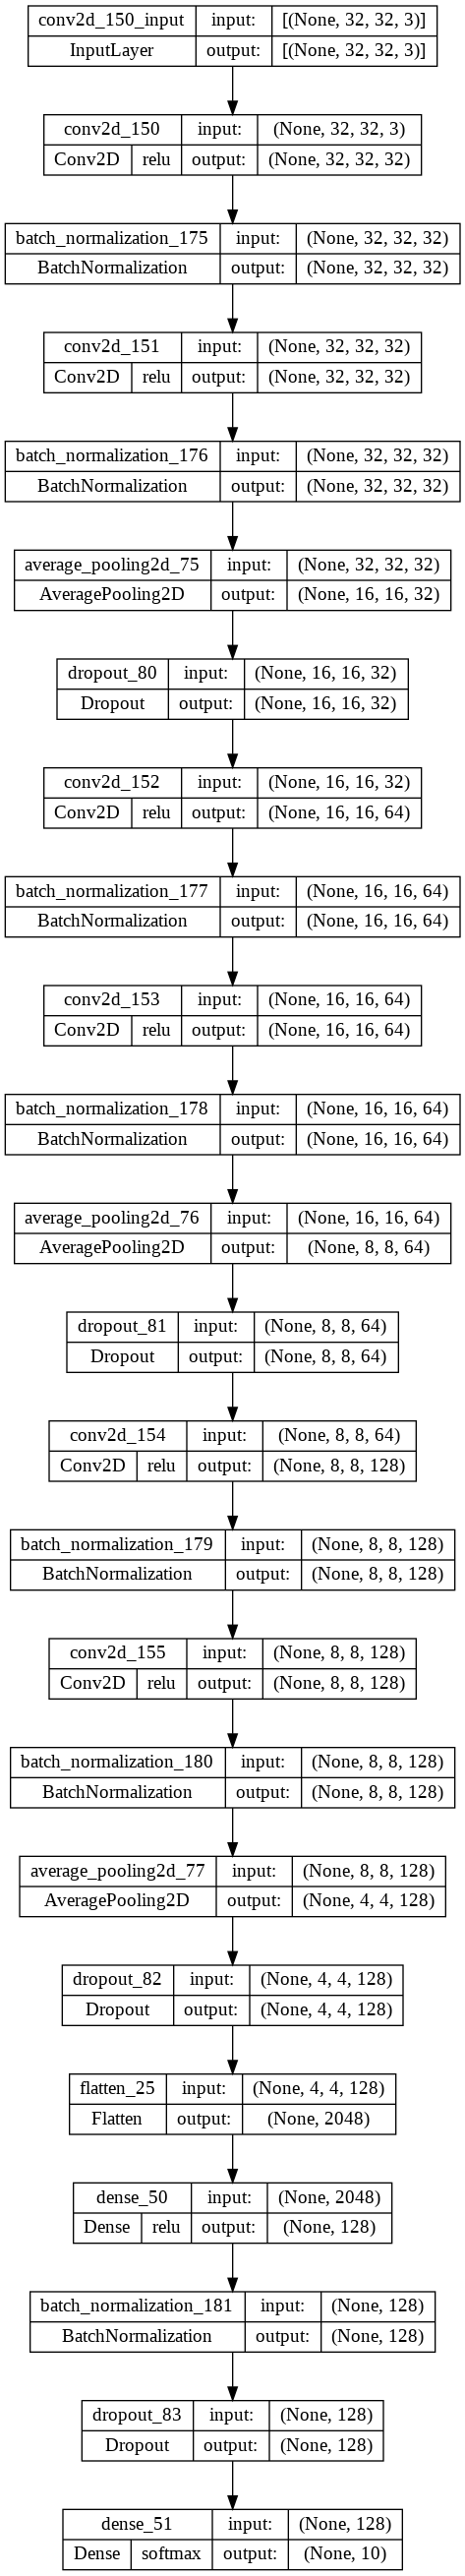

In [ ]:
plot_model(model8, show_shapes=True, show_layer_names=True, show_layer_activations=True)

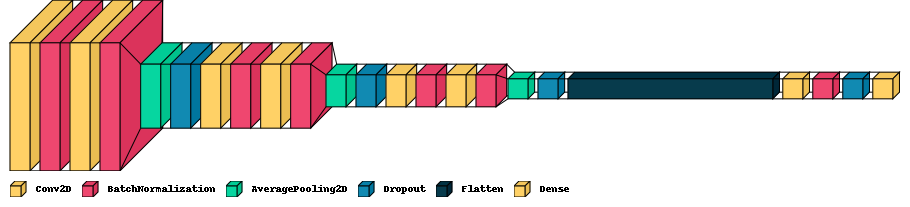

In [ ]:
visualkeras.layered_view(model8, legend=True)

### Train and test

Setting parameters for data augmentation.

In [ ]:
datagen = image.ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

# Train the model using the fit_generator method
model8_history = model8.fit(datagen.flow(X_train, y_train, batch_size=32), 
                            steps_per_epoch=len(X_train) / 32,
                            epochs=20,
                            validation_data=(X_test, y_test))


Epoch 1/20
1562/1562 [==============================] - 29s 18ms/step - loss: 1.0861 - accuracy: 0.6241 - val_loss: 0.9770 - val_accuracy: 0.6775
Epoch 2/20
1562/1562 [==============================] - 30s 19ms/step - loss: 1.0654 - accuracy: 0.6338 - val_loss: 1.0514 - val_accuracy: 0.6561
Epoch 3/20
1562/1562 [==============================] - 29s 18ms/step - loss: 1.0432 - accuracy: 0.6414 - val_loss: 0.9198 - val_accuracy: 0.6998
Epoch 4/20
1562/1562 [==============================] - 29s 19ms/step - loss: 1.0235 - accuracy: 0.6499 - val_loss: 0.8698 - val_accuracy: 0.7158
Epoch 5/20
1562/1562 [==============================] - 29s 18ms/step - loss: 1.0171 - accuracy: 0.6520 - val_loss: 0.9004 - val_accuracy: 0.7092
Epoch 6/20
1562/1562 [==============================] - 29s 19ms/step - loss: 1.0103 - accuracy: 0.6546 - val_loss: 0.8440 - val_accuracy: 0.7213
Epoch 7/20
1562/1562 [==============================] - 30s 19ms/step - loss: 0.9884 - accuracy: 0.6617 - val_loss: 0.8875 -

### Result

Surprisingly, this had a negative effect on performance. The high loss could be indicating that the images are too distorted, creating uncertainty in the classification. This effect could be amplified as the images are only 32x32.

In [ ]:
history8 = pd.DataFrame(model8_history.history)
history8 = history8.rename(columns = {'accuracy': 'Accuracy', 'val_accuracy': 'Validation Accuracy', 'loss': 'Loss', 'val_loss': 'Validation Loss'})
hist8_accuracy = history8['Accuracy']
hist8_val_accuracy = history8['Validation Accuracy']
hist8_loss = history8['Loss']
hist8_val_loss = history8['Validation Loss']

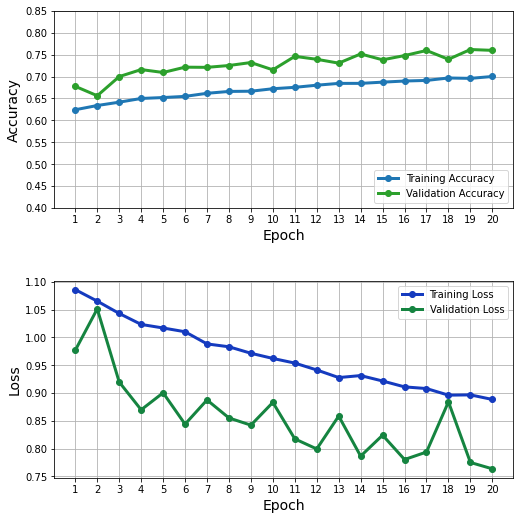

In [ ]:
# plot training accuracy and validation accuracy
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.plot(hist8_accuracy, color='tab:blue', marker='o', linewidth=3)
plt.plot(hist8_val_accuracy, color='tab:green', marker='o', linewidth=3)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.xticks(np.arange(len(range(0, 20))), np.arange(1, len(range(0, 21))))
plt.yticks(np.arange(0.4, 0.9, 0.05))
plt.grid()

# plot training loss and validation loss
plt.subplot(212)
plt.plot(hist8_loss, color='#153BBF', marker='o', linewidth=3)
plt.plot(hist8_val_loss, color='#158440', marker='o', linewidth=3)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.xticks(np.arange(len(range(0, 20))), np.arange(1, len(range(0, 21))))

plt.grid()

plt.tight_layout(pad=3.5)
plt.show()

## Experiment 9 - Transfer Learning VGG16

### Model Architecture and Details

Applying the VGG16 model and adding dense layers to make it compatible with the dataset.

In [ ]:
from keras.applications import vgg16 as vgg

# Import pretrained model without the top layer
base_model = vgg.VGG16(weights='imagenet',
                       include_top=False, 
                       input_shape=(32, 32, 3))

# Construct model
model9 =  tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [ ]:
model9.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### The summary and visualisation

In [ ]:
model9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_8 (Flatten)         (None, 512)               0         
                                                                 
 dense_57 (Dense)            (None, 512)               262656    
                                                                 
 dense_58 (Dense)            (None, 256)               131328    
                                                                 
 dense_59 (Dense)            (None, 10)                2570      
                                                                 
Total params: 15,111,242
Trainable params: 15,111,242
Non-trainable params: 0
_________________________________________________________________


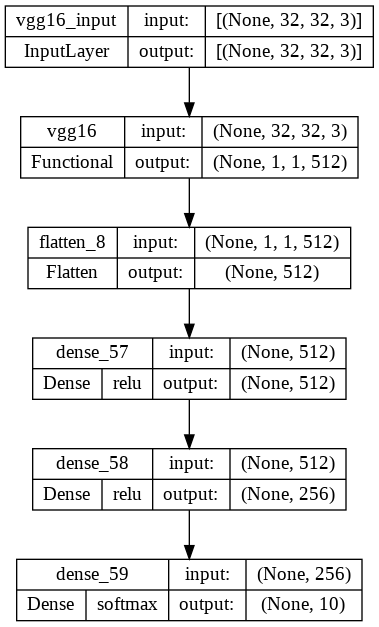

In [ ]:
plot_model(model9, show_shapes=True, show_layer_names=True, show_layer_activations=True)

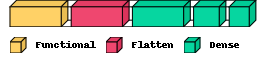

In [ ]:
visualkeras.layered_view(model9, legend=True)

### Train and test

In [ ]:
model9_history = model9.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 15s 9ms/step - loss: 1.7981 - accuracy: 0.2665 - val_loss: 1.5009 - val_accuracy: 0.3805
Epoch 2/20
1563/1563 [==============================] - 15s 9ms/step - loss: 1.3925 - accuracy: 0.4482 - val_loss: 1.2243 - val_accuracy: 0.5297
Epoch 3/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1556 - accuracy: 0.5721 - val_loss: 1.0440 - val_accuracy: 0.6230
Epoch 4/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9540 - accuracy: 0.6710 - val_loss: 0.9607 - val_accuracy: 0.6809
Epoch 5/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8129 - accuracy: 0.7240 - val_loss: 0.9359 - val_accuracy: 0.6982
Epoch 6/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7147 - accuracy: 0.7605 - val_loss: 0.7690 - val_accuracy: 0.7528
Epoch 7/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6278 - accuracy: 0.7929 - val_loss: 0.7773 - val_ac

### Results

A decent result, but not as good as the implementation created from scratch. Possibly due to a lack of data pre-processing. 

In [ ]:
history9 = pd.DataFrame(model9_history.history)
history9 = history9.rename(columns = {'accuracy': 'Accuracy', 'val_accuracy': 'Validation Accuracy', 'loss': 'Loss', 'val_loss': 'Validation Loss'})
hist9_accuracy = history9['Accuracy']
hist9_val_accuracy = history9['Validation Accuracy']
hist9_loss = history9['Loss']
hist9_val_loss = history9['Validation Loss']

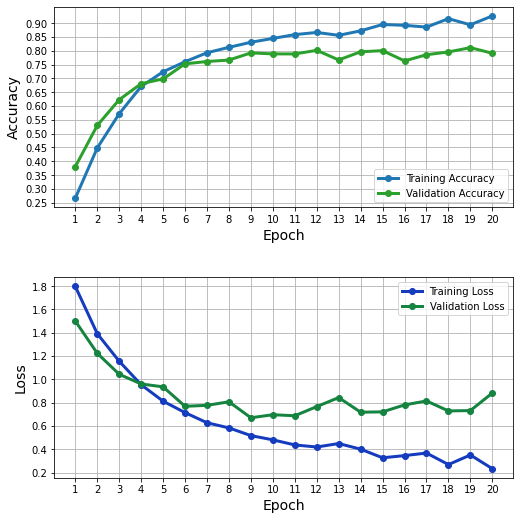

In [ ]:
# plot training accuracy and validation accuracy
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.plot(hist9_accuracy, color='tab:blue', marker='o', linewidth=3)
plt.plot(hist9_val_accuracy, color='tab:green', marker='o', linewidth=3)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.xticks(np.arange(len(range(0, 20))), np.arange(1, len(range(0, 21))))
plt.yticks(np.arange(0.25, 0.95, 0.05))
plt.grid()

# plot training loss and validation loss
plt.subplot(212)
plt.plot(hist9_loss, color='#153BBF', marker='o', linewidth=3)
plt.plot(hist9_val_loss, color='#158440', marker='o', linewidth=3)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.xticks(np.arange(len(range(0, 20))), np.arange(1, len(range(0, 21))))

plt.grid()

plt.tight_layout(pad=3.5)
plt.show()

## Experiment 10 - Transfer Learning InceptionResNetV2 and Applying Input Pre-Processing

### Importing Data and Pre-Processing the Input

Ensuring the data is in the right format for the model.

In [ ]:
(X_train_10, y_train_10), (X_test_10, y_test_10) = tf.keras.datasets.cifar10.load_data()

X_train_new, y_train_new = applications.inception_resnet_v2.preprocess_input(X_train_10), to_categorical(y_train_10, 10)
X_test_new, y_test_new = applications.inception_resnet_v2.preprocess_input(X_test_10), to_categorical(y_test_10, 10)

### Model Architecture and Details

Resizing all the images and then applying the InceptionResNetV2 model. Added global average pooling and dropout to further increase accuracy.

In [ ]:
base_model = applications.InceptionResNetV2(include_top=False,
                                            weights="imagenet",
                                            input_shape=(299, 299, 3),
                                            )

# define the model architecture
model10 = tf.keras.models.Sequential([
  
  tf.keras.layers.Lambda(lambda image : tf.image.resize(image, (299, 299)), input_shape=(32, 32, 3)),
  base_model,
  
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(500, activation='relu'),
  
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(10, activation='softmax')
])

base_model.trainable = False
optimizer = tf.keras.optimizers.Adam()
model10.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

219055592/219055592 [==============================] - 7s 0us/step


### The summary and visualisation

In [ ]:
model10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 299, 299, 3)       0         
                                                                 
 inception_resnet_v2 (Functi  (None, 8, 8, 1536)       54336736  
 onal)                                                           
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 500)               768500    
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5

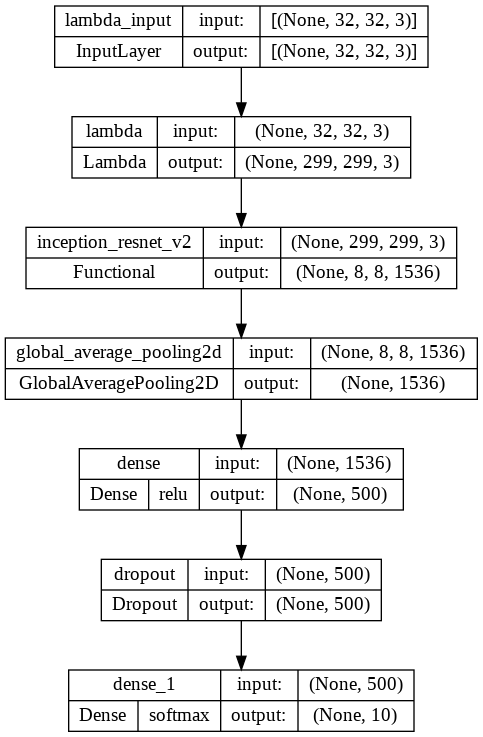

In [ ]:
plot_model(model10, show_shapes=True, show_layer_names=True, show_layer_activations=True)

### Train and test

In [ ]:
model10_history = model10.fit(X_train_new, y_train_new, epochs=5, validation_data=(X_test_new, y_test_new))

Epoch 1/5
1563/1563 [==============================] - 664s 418ms/step - loss: 0.3876 - accuracy: 0.8717 - val_loss: 0.3140 - val_accuracy: 0.8986
Epoch 2/5
1563/1563 [==============================] - 649s 416ms/step - loss: 0.3092 - accuracy: 0.8963 - val_loss: 0.2831 - val_accuracy: 0.9034
Epoch 3/5
1563/1563 [==============================] - 650s 416ms/step - loss: 0.2838 - accuracy: 0.9049 - val_loss: 0.2658 - val_accuracy: 0.9109
Epoch 4/5
1563/1563 [==============================] - 650s 416ms/step - loss: 0.2672 - accuracy: 0.9098 - val_loss: 0.2586 - val_accuracy: 0.9133
Epoch 5/5
1563/1563 [==============================] - 649s 415ms/step - loss: 0.2561 - accuracy: 0.9118 - val_loss: 0.2621 - val_accuracy: 0.9122


### Results

A very impressive result. Although without any batches, it took 30 minutes to train 5 epochs on a model with 55 million parameters.

In [ ]:
history10 = pd.DataFrame(model10_history.history)
history10 = history10.rename(columns = {'accuracy': 'Accuracy', 'val_accuracy': 'Validation Accuracy', 'loss': 'Loss', 'val_loss': 'Validation Loss'})
hist10_accuracy = history10['Accuracy']
hist10_val_accuracy = history10['Validation Accuracy']
hist10_loss = history10['Loss']
hist10_val_loss = history10['Validation Loss']

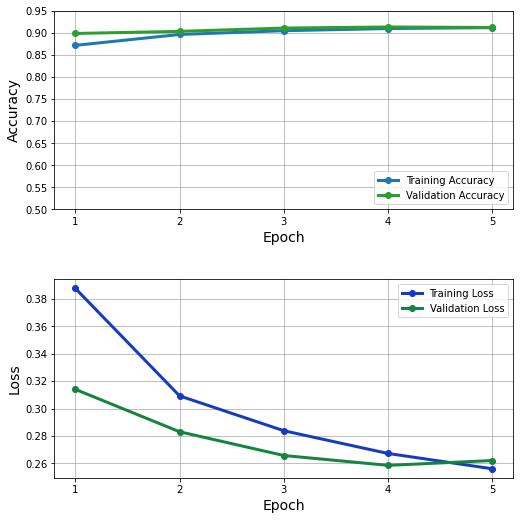

In [ ]:
# plot training accuracy and validation accuracy
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.plot(hist10_accuracy, color='tab:blue', marker='o', linewidth=3)
plt.plot(hist10_val_accuracy, color='tab:green', marker='o', linewidth=3)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.xticks(np.arange(len(range(0, 5))), np.arange(1, len(range(0, 6))))
plt.yticks(np.arange(0.5, 1, 0.05))
plt.grid()

# plot training loss and validation loss
plt.subplot(212)
plt.plot(hist10_loss, color='#153BBF', marker='o', linewidth=3)
plt.plot(hist10_val_loss, color='#158440', marker='o', linewidth=3)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.xticks(np.arange(len(range(0, 5))), np.arange(1, len(range(0, 6))))

plt.grid()

plt.tight_layout(pad=3.5)
plt.show()